In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import SpectralBiclustering
from scipy.stats import zscore
import scipy.io as sci
%matplotlib inline

In [3]:
p = np.load('ica_edf_pearson.npy')
len(p[0])

1830

In [2]:
p = np.load('raw_pearson.npy')

In [4]:
high = 0
for row in p:
    for val in row:
        if(val >= .9):
            high = high +1
print high

13535


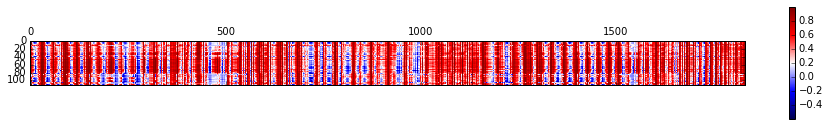

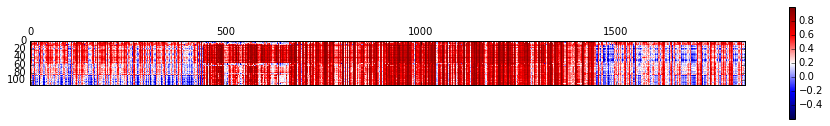

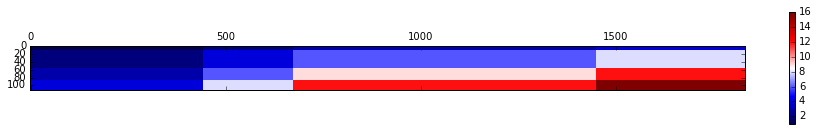

In [5]:
spectral_model = SpectralBiclustering(n_clusters=4)
spectral_model.fit(p)


fit_data = p[np.argsort(spectral_model.row_labels_)]
fit_data = fit_data[:, np.argsort(spectral_model.column_labels_)]

plt.figure(figsize=(20,20))
plt.matshow(p, cmap=plt.cm.seismic)
plt.colorbar()

plt.figure(figsize=(20,20))
plt.matshow(fit_data, cmap=plt.cm.seismic)
plt.colorbar()

plt.figure(figsize=(20,20))
plt.matshow(np.outer(np.sort(spectral_model.row_labels_) + 1,
                     np.sort(spectral_model.column_labels_) + 1),
            cmap=plt.cm.seismic)
plt.colorbar()

In [7]:
import mne

In [8]:
m = mne.io.read_raw_edf('s5d2_final.edf', stim_channel=None, preload=True)


Extracting edf Parameters from s5d2_final.edf...
Setting channel info structure...
Creating Raw.info structure...
Reading 0 ... 3383999  =      0.000 ...  3383.999 secs...
Ready.


In [9]:
names = m.ch_names[:61]
print names

[u'FP1', u'Fz', u'F3', u'F7', u'FT9', u'FC5', u'FC1', u'C3', u'T7', u'CP5', u'CP1', u'Pz', u'P3', u'P7', u'O1', u'Oz', u'O2', u'P4', u'P8', u'TP10', u'CP6', u'CP2', u'Cz', u'C4', u'T8', u'FT10', u'FC6', u'FC2', u'F4', u'F8', u'FP2', u'AF7', u'AF3', u'AFz', u'F1', u'F5', u'FT7', u'FC3', u'FCz', u'C1', u'C5', u'TP7', u'CP3', u'P1', u'P5', u'PO7', u'PO3', u'POz', u'PO4', u'PO8', u'P6', u'P2', u'CPz', u'CP4', u'TP8', u'C6', u'C2', u'FC4', u'FT8', u'F6', u'F2']


In [9]:
names = ['FP1', 'Fz', 'F3', 'F7', 'FT9', 'FC5', 'FC1', 'C3', 'T7', 'TP9', 'CP5', 'CP1', 'Pz', 'P3', 'P7', 'O1', 'Oz', 
         'O2', 'P4', 'P8', 'TP10', 'CP6', 'CP2', 'Cz', 'C4', 'T8', 'FT10', 'FC6', 'FC2', 'F4', 'F8', 'FP2', 'AF7', 
         'AF3', 'AFz', 'F1', 'F5', 'FT7', 'FC3', 'FCz', 'C1', 'C5', 'TP7', 'CP3', 'P1', 'P5', 'PO7', 'PO3', 'POz', 
         'PO4', 'PO8', 'P6', 'P2', 'CPz', 'CP4', 'TP8', 'C6', 'C2', 'FC4', 'FT8', 'F6'];

In [10]:
print len(names)
C= [(a,b) for a in names for b in names if names.index(a)<names.index(b)]
print len(C)

61
1830


In [11]:
import json as simplejson
with open('media/json/channel_compare_mapping.json', 'w+') as f:
    f.write(simplejson.dumps({'data': C}))

In [16]:
diagmask = [ a!=b for a,b in C]

In [20]:
diagmask

[False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 Tr

In [5]:
import numpy as np

In [18]:
non_diags=(np.array(diagmask)).nonzero()

In [10]:
non_diags

(array([   1,    2,    3, ..., 2011, 2012, 2014]),)

In [6]:
p = np.load('ica_full_pearson.npy')

In [7]:
q=[]
for i in range(112):
    q.append(p[i,non_diags])

NameError: name 'non_diags' is not defined

In [29]:
q

NameError: name 'q' is not defined

In [7]:
print len(p)
i=1
time = 1
for a in p:
    print a.argmax()
    i=0
    index = 0
    print 'time', time
    for val in a:
        if(i<25 and val>=0.9):
            print index
            i = i +1
        index = index + 1
    i = i+1
    time = time +1

112
780
time 1
29
30
31
32
60
90
91
92
96
118
121
122
148
149
150
151
153
360
372
375
376
377
555
566
583
780
time 2
0
29
30
31
32
60
86
88
90
91
92
93
96
118
122
147
148
149
150
151
153
154
176
204
208
780
time 3
29
30
31
32
34
60
86
88
90
91
92
93
96
118
119
147
148
149
150
151
176
204
205
208
321
780
time 4
60
64
90
91
92
96
118
122
148
150
151
153
360
372
375
376
377
428
430
433
555
583
586
587
596
780
time 5
29
30
31
32
60
86
90
91
92
96
118
148
149
150
151
204
208
321
375
376
377
401
428
430
431
780
time 6
29
30
31
32
60
86
88
90
91
92
96
118
122
148
149
150
151
153
360
372
375
376
377
536
583
780
time 7
29
31
32
60
86
90
91
92
118
148
150
151
375
376
430
433
536
583
586
587
596
636
640
644
645
780
time 8
29
31
32
60
86
90
91
92
118
148
149
150
151
208
375
376
430
433
536
583
586
587
596
636
640
780
time 9
29
31
32
60
86
90
91
92
96
118
148
149
150
151
208
375
376
430
433
506
536
583
586
587
596
780
time 10
32
60
90
91
92
96
118
148
150
151
375
376
401
430
433
536
555
583
586
587

In [18]:
non_diags[0][808]

823

In [8]:
C[29]

(u'FP1', u'FP2')

In [6]:
names.index('FP1')

0

In [7]:
names.index('FP2')

30

32 1807250
29 1807250
61
